Загрузим ряд закрытия Док-Джонса и оценим его через HMM, выведем наивный прогноз ряда 

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667733
4 -752.020147266899
5 -737.1181370073002
6 -729.5671112589439
7 -713.7233778326238
8 -702.1073061994869
9 -690.9838068209651


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


10 -691.2727450856179
11 -676.9229876283403


Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


12 -677.0311342357589
13 -650.9467111345384


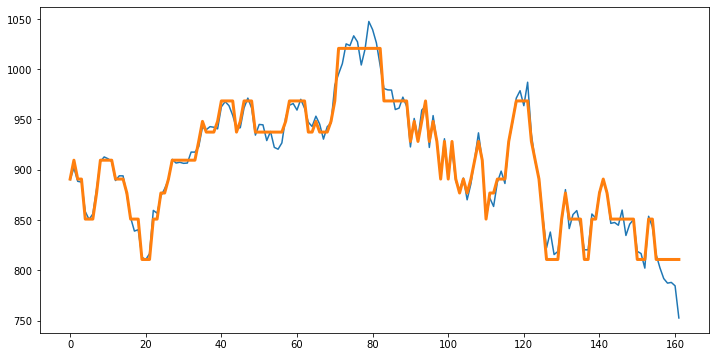

In [2]:
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

series = pd.read_csv("./external_data/dow_jones/weekly-closings-of-the-dowjones.csv")["Close"]
values = series.values.reshape(-1,1)

for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))
    
    model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)